# Regularization

Table of Contents
1 - Packages

2 - Problem Statement

3 - Loading the Dataset

4 - Non-Regularized Model

5 - L2 Regularization

Exercise 1 - compute_cost_with_regularization

Exercise 2 - backward_propagation_with_regularization

6 - Dropout

6.1 - Forward Propagation with Dropout

Exercise 3 - forward_propagation_with_dropout

6.2 - Backward Propagation with Dropout

Exercise 4 - backward_propagation_with_dropout

7 - Conclusions

# 1 - Packages

In [9]:

from google.colab import files
uploaded = files.upload()

Saving reg_utils.py to reg_utils.py


In [10]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# 2 - Problem Statement

You have just been hired as an AI expert by the French Football Corporation.

 **They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head.**

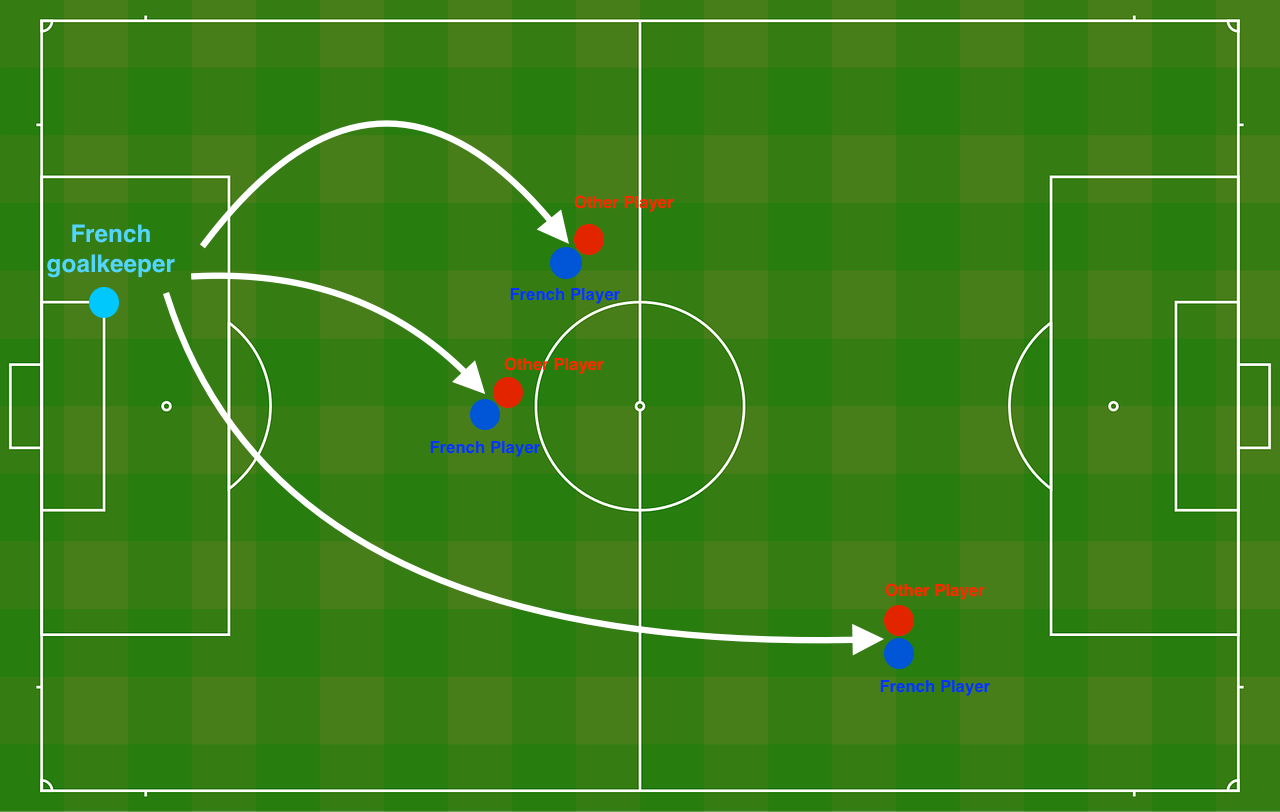

# 3 - Loading the Dataset

In [11]:

from google.colab import files
uploaded = files.upload()

Saving data.mat to data.mat
Saving test_catvnoncat.h5 to test_catvnoncat.h5
Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [12]:
def load_2D_dataset():
    data = scipy.io.loadmat('/content/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);

    return train_X, train_Y, test_X, test_Y

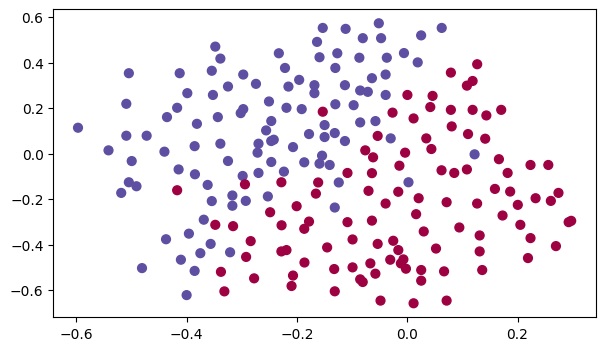

In [13]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.

**If the dot is blue, it means the French player managed to hit the ball with his/her head**

**If the dot is red, it means the other team's player hit the ball with their head**

**Your goal: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.**

Analysis of the dataset: This dataset is a little noisy, but it looks like a diagonal line separating the upper left half (blue) from the lower right half (red) would work well.

# 4 - Non-Regularized Model

This model can be used:

**In regularization mode -- by setting the lambd input to a non-zero value. We use "lambd" instead of "lambda" because "lambda" is a reserved keyword in Python.**

**In dropout mode -- by setting the keep_prob to a value less than one**
You will first try the model without any regularization. Then, you will implement:

**L2 regularization **-- functions:

**"compute_cost_with_regularization()" and "backward_propagation_with_regularization()"**

Dropout -- functions:

"**forward_propagation_with_dropout()**"
 and "**backward_propagation_with_dropout**()"

In [14]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    """

    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]

    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)

        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout,
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724216
Cost after iteration 20000: 0.13851642423254343


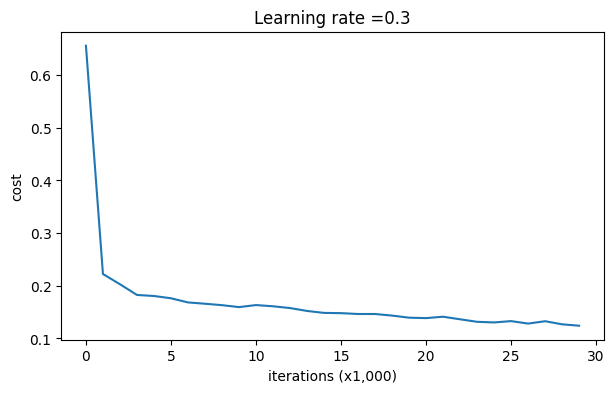

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [16]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The train accuracy is **94.8% **while the test accuracy is **91.5%.** This is the baseline model.

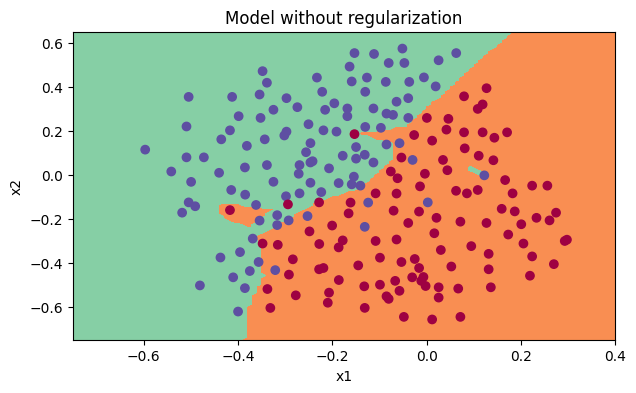

In [17]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# 5 - L2 Regularization

Exercise 1 - **compute_cost_with_regularization**

In [25]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):

    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost

    L2_regularization_cost = lambd/(2*m)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))


    cost = cross_entropy_cost + L2_regularization_cost

    return cost

In [27]:
A3, cache = forward_propagation(train_X, parameters)
cost = compute_cost_with_regularization(A3, train_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

cost = 0.29751988518172917


Exercise 2 -
 **backward_propagation_with_regularization**

In [28]:
def backward_propagation_with_regularization(X, Y, cache, lambd):

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m)*W3
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))

    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

In [32]:
grads = backward_propagation_with_regularization(train_X, train_Y, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))

dW1 = 
[[ 0.01660027  0.01554241]
 [ 0.04829464  0.02185705]
 [ 0.00481357  0.0098629 ]
 [-0.00118651 -0.00717743]
 [ 0.00528957  0.010839  ]
 [-0.05484062  0.00211988]
 [-0.00142099  0.02041842]
 [ 0.00818369  0.01675518]
 [-0.00848142 -0.01586341]
 [ 0.00745567  0.00208205]
 [ 0.01679553  0.03800924]
 [ 0.00560221  0.00233609]
 [-0.00145678 -0.0030434 ]
 [ 0.00524194  0.0008282 ]
 [ 0.00058893  0.00882294]
 [ 0.00164024  0.01607834]
 [-0.0263608  -0.01348058]
 [-0.01228872 -0.02231351]
 [-0.05014619 -0.0561803 ]
 [-0.01543702 -0.05788698]]
dW2 = 
[[-0.01328112 -0.035815    0.00134162 -0.00809076  0.00127222 -0.08407789
  -0.00778864  0.00226199 -0.05692465 -0.01242888 -0.03550755 -0.00921825
  -0.01091518 -0.00189694 -0.02470789  0.01610536 -0.02086979 -0.06578379
  -0.0725485  -0.05851157]
 [ 0.0154512   0.04125809 -0.00176515  0.00929758 -0.00220895  0.09100336
   0.00936701 -0.00305795  0.05958031  0.01616084  0.03953878  0.01327988
   0.01303427  0.00537566  0.02901252 -0.0167439

Let's now run the model with L2 regularization  (𝜆=0.7)
 . The model() function will call:

**compute_cost_with_regularization instead of compute_cost**

**backward_propagation_with_regularization instead of backward_propagation**


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


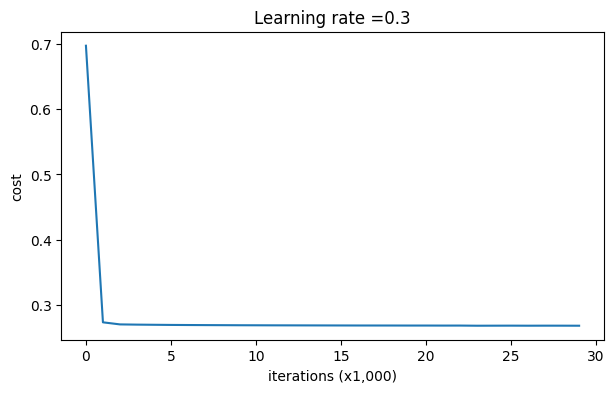

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [33]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

**The test set accuracy increased to 93%**.

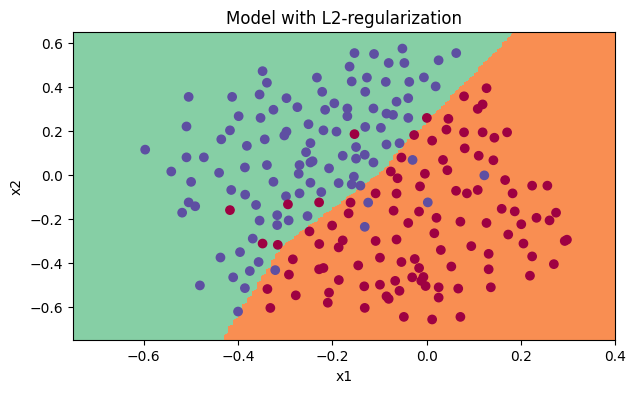

In [34]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Observations:

The value of  𝜆
  is a hyperparameter that you can tune using a dev set

L2 regularization makes your decision boundary smoother. If  𝜆
  is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes.


**What you should remember**:
The implications of L2-regularization on:

**The cost computation**:
A regularization term is added to the cost.

**The backpropagation function**:
There are extra terms in the gradients with respect to weight matrices.

**Weights end up smaller** ("weight decay"):

**Weights are pushed to smaller values**.

# 6 - Dropout
Finally, dropout is a widely used regularization technique that is specific to deep learning. It randomly shuts down some neurons in each iteration

**6.1 - Forward Propagation with Dropout**

In [35]:

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):


    np.random.seed(1)

    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    D1 = np.random.rand(A1.shape[0], A1.shape[1])     # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = (D1 < keep_prob).astype(int)                 # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1*D1
    A1 = A1/keep_prob


    # YOUR CODE ENDS HERE
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])     # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = (D2 < keep_prob)                             # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2*D2                                        # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob


    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

In [42]:
A3, cache = forward_propagation_with_dropout(train_X, parameters, keep_prob=0.7)
print ("A3 = " + str(A3))



A3 = [[1.17774195e-01 9.99812843e-01 9.99876503e-01 6.86578794e-01
  9.98578343e-01 6.47650558e-01 8.44908876e-01 2.52347261e-01
  8.58953754e-02 2.60901194e-01 9.99917705e-01 9.99141782e-01
  9.90546343e-01 6.15146409e-01 9.99449733e-01 9.99835966e-01
  9.90318793e-01 9.49845935e-01 3.75574565e-03 9.91859331e-01
  6.86578794e-01 2.42873735e-02 5.91258853e-02 8.44851110e-02
  4.56289165e-06 8.23038830e-03 1.60064347e-06 5.19100635e-01
  5.53009218e-04 3.60719823e-03 1.16336638e-04 1.85753605e-04
  6.86578794e-01 8.13744354e-07 4.62347927e-07 3.08255468e-02
  2.06789762e-01 7.05146895e-04 4.60940590e-01 1.58938005e-02
  9.95190511e-01 9.89649964e-01 5.13350041e-03 7.42141295e-01
  1.17156831e-01 6.36937704e-01 1.06429445e-05 6.80464611e-07
  1.32372421e-07 3.03079651e-07 1.60397580e-03 4.82488535e-01
  1.20372982e-01 3.99822942e-03 2.29244522e-03 2.02971320e-07
  4.21450365e-04 6.86578794e-01 4.10874540e-07 9.91702076e-01
  3.16176896e-06 3.70743333e-05 1.49405702e-05 5.28726802e-05
  1

**6.2 - Backward Propagation with Dropout**

In [43]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):

    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)

    dA2 = dA2*D2            # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob     # Step 2: Scale the value of neurons that haven't been shut down


    # YOUR CODE ENDS HERE
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)

    dA1 = dA1*D1            # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob     # Step 2: Scale the value of neurons that haven't been shut down

    # YOUR CODE ENDS HERE
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

In [44]:
gradients = backward_propagation_with_dropout(train_X, train_Y, cache, keep_prob=0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

dA1 = 
[[ 1.72382784e+00  0.00000000e+00  4.04742978e-04 ...  0.00000000e+00
  -0.00000000e+00 -3.02729124e+00]
 [ 0.00000000e+00  3.40262781e-04  2.24526003e-04 ...  0.00000000e+00
  -7.31743267e-01 -1.67935119e+00]
 [-1.81538987e+00 -6.45559186e-04 -4.25979072e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.67237567e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.27976002e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.84041454e-05 ...  0.00000000e+00
  -0.00000000e+00 -2.12449938e-01]
 [ 4.83206598e+00  1.71578387e-03  1.13217817e-03 ...  0.00000000e+00
  -0.00000000e+00 -8.46817179e+00]]
dA2 = 
[[-0.00000000e+00 -4.66749811e-04 -3.07989811e-04 -0.00000000e+00
  -3.54546866e-03 -8.78723988e-01 -3.86781628e-01 -1.86457056e+00
  -0.00000000e+00 -0.00000000e+00 -2.05234189e-04 -2.14030851e-03
  -2.35764664e-02 -9.59786058e-01 -1.37231141e-03 -4.09083557e-04
  -2.41439549e-02 -1.25079183e-01 -0.00000000e+00 -2.03020069e-02
   0.00000000e+00  0

Cost after iteration 0: 0.6543912405149825


/content/reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/content/reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


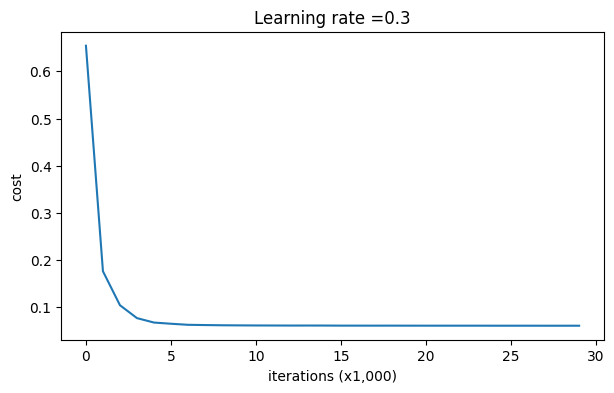

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [45]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

**Dropout works great! The test accuracy has increased again (to 95%)!**

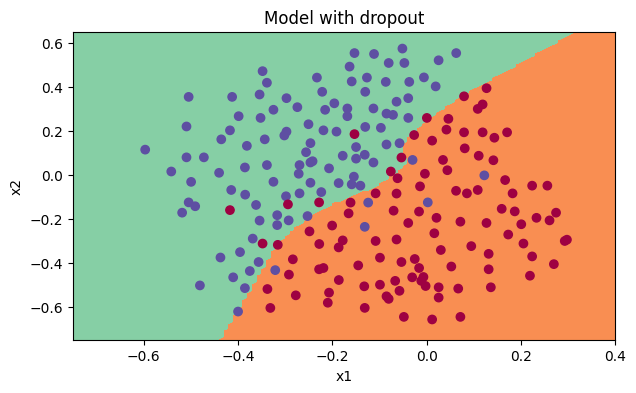

In [46]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Note:

A **common mistake **when using dropout is to use it both in training and testing. You should use dropout (randomly eliminate nodes) only in training.

**Deep learning frameworks like TensorFlow, PaddlePaddle, Keras or caffe come with a dropout layer implementation.**

# 7 - Conclusions
Here are the results of our three models:

model	     **train accuracy**      	**test accuracy**

3-layer NN without regularization **95%** 	**91.5%**

3-layer NN with L2-regularization	**94%**	**93%**

3-layer NN with dropout	**93%**    **95%**
